In [1]:
from onnx import load
import onnxruntime as rt
import numpy as np
import pandas as pd
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
with open("model_3d_with_other_transformer.onnx", "rb") as f:
    onnx_model = load(f)

In [3]:
print(onnx_model)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
sess = rt.InferenceSession("model_3d_with_other_transformer.onnx")

In [5]:
input_name = sess.get_inputs()[0].name
print("input name", input_name)
input_shape = sess.get_inputs()[0].shape
print("input shape", input_shape)
input_type = sess.get_inputs()[0].type
print("input type", input_type)

input name input_1
input shape ['unk__684', 20, 3]
input type tensor(float)


In [6]:
output_name = sess.get_outputs()[0].name
print("output name", output_name)
output_shape = sess.get_outputs()[0].shape
print("output shape", output_shape)
output_type = sess.get_outputs()[0].type
print("output type", output_type)

output name outputs
output shape ['unk__685', 7]
output type tensor(float)


In [7]:
def generate_mixed_shape(shape1, shape2, shape3, shape4):
    shape = []
    shape.extend(shape1[:15].tolist())
    shape.extend(shape2[15:30].tolist())
    shape.extend(shape3[30:45].tolist())
    shape.extend(shape4[45:60].tolist())
    return pd.DataFrame([shape])

In [8]:
from numpy.random import uniform
def generate_noisy_shape(shape):
    noisyShape = []
    for val in shape:
        noisyShape.append(val + uniform(-0.3, 0.3))
    return pd.DataFrame([noisyShape])

In [9]:
symbol_data = pd.read_csv("data/dataset1_fixed.csv", header=None)
X = symbol_data.iloc[:, :-1]
Y = symbol_data.iloc[:,-1:]
Y = Y.replace("Time", 0)
Y = Y.replace("Wind", 1)
Y = Y.replace("Air", 1)
Y = Y.replace("Fire", 2)
Y = Y.replace("Earth", 3)
Y = Y.replace("Water", 4)
Y = Y.replace("Lightning", 5)

for i in range(100):
    random_symbols = X.sample(n=4)
    X = pd.concat([X, generate_mixed_shape(random_symbols.iloc[0], random_symbols.iloc[1], random_symbols.iloc[2],
                                           random_symbols.iloc[3])])
    Y = pd.concat([Y, pd.DataFrame([6], columns=[60])])

for i in range(100):
    random_symbol = X.sample(n=1)
    X = pd.concat([X, pd.DataFrame(generate_noisy_shape(random_symbol.iloc[0]))])
    Y = pd.concat([Y, pd.DataFrame([6], columns=[60])])

X_3d = [np.array(X.iloc[[i]]).reshape(-1, 3) for i in range(len(X))]

In [10]:
X_3d

[array([[0.000000e+00, 2.000000e-01, 9.389400e-01],
        [2.591682e-02, 1.443034e-01, 0.000000e+00],
        [9.137405e-02, 2.797381e-01, 1.347351e-06],
        [1.908413e-01, 3.945632e-01, 2.721208e-05],
        [3.470694e-01, 4.034796e-01, 2.042318e-04],
        [4.430471e-01, 3.052922e-01, 4.392389e-04],
        [5.232094e-01, 2.080287e-01, 6.345693e-04],
        [6.167207e-01, 1.341172e-01, 8.098980e-04],
        [7.303643e-01, 1.098443e-01, 9.586425e-04],
        [8.392057e-01, 1.551085e-01, 1.029769e-03],
        [9.288197e-01, 2.331859e-01, 1.002295e-03],
        [9.877768e-01, 3.372881e-01, 8.724006e-04],
        [1.000000e+00, 4.558639e-01, 6.612216e-04],
        [9.639041e-01, 5.703453e-01, 4.062214e-04],
        [8.449724e-01, 6.132913e-01, 2.379197e-04],
        [7.210903e-01, 5.436545e-01, 2.601953e-04],
        [6.835346e-01, 4.137852e-01, 4.576262e-04],
        [7.544716e-01, 3.166604e-01, 6.774768e-04],
        [8.668190e-01, 3.669502e-01, 5.917255e-04],
        [8.6

In [11]:
print(sess.run([output_name], {input_name: np.array(X_3d).astype(np.float32)}))

[array([[3.89627676e-05, 9.90137935e-01, 3.72864929e-06, 1.36577594e-03,
        1.61916032e-05, 3.73039740e-07, 8.43703747e-03],
       [6.78062270e-06, 9.94227886e-01, 3.52194343e-06, 1.76869717e-03,
        2.14133215e-05, 1.20256823e-06, 3.97049356e-03],
       [8.73668250e-06, 9.54622328e-01, 2.88890715e-06, 7.58830342e-04,
        4.99478629e-05, 4.74565513e-06, 4.45525683e-02],
       [5.80311389e-05, 9.94983077e-01, 3.99794817e-06, 4.42831684e-03,
        9.86170471e-06, 1.00763394e-07, 5.16604050e-04],
       [9.73540809e-05, 9.89113450e-01, 1.30988872e-06, 7.99377623e-04,
        1.51749682e-05, 1.30114898e-07, 9.97316558e-03],
       [1.59298925e-05, 9.99111116e-01, 1.49684661e-06, 7.83697644e-04,
        5.65746916e-07, 5.15660536e-09, 8.72404707e-05],
       [3.90554960e-05, 9.99691129e-01, 7.32320586e-07, 2.04407188e-04,
        6.67254255e-07, 1.52388999e-08, 6.40487124e-05],
       [3.89912566e-05, 9.99542236e-01, 1.37615405e-06, 3.48056288e-04,
        1.33771232e-06, 

[[218   0   0   0   1   0   6]
 [  0 244   1   0   0   1   4]
 [  0   0 105   0   0   0   0]
 [  0   0   0 217   0   0   0]
 [  0   0   0   3 263   0   0]
 [  0   0   0   0   0 235   1]
 [  4   1   0   1   3   2 189]]


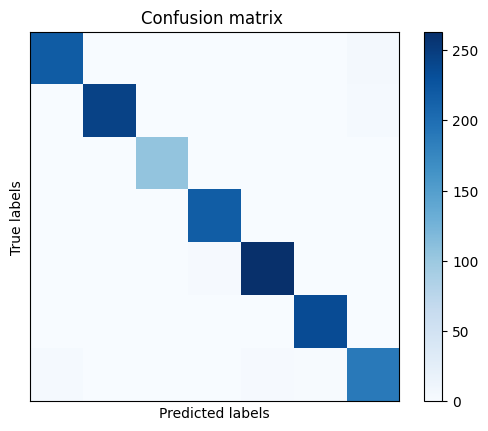

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# confusion matrix
y_pred = sess.run([output_name], {input_name: np.array(X_3d).astype(np.float32)})
y_pred = np.argmax(y_pred[0], axis=1)
y_true = Y
cm = confusion_matrix(y_true, y_pred)
#cm = [c[0:-1] for c in cm[0:-1]]
print(cm)
# plot
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title("Confusion matrix ")
plt.colorbar()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.981320880587058

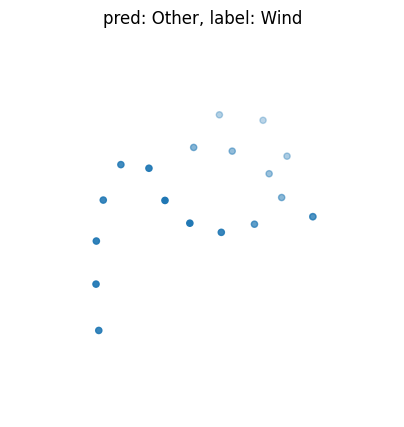

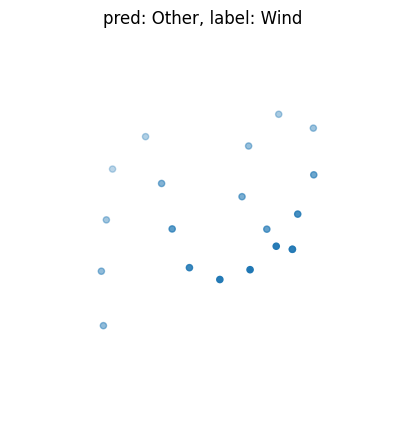

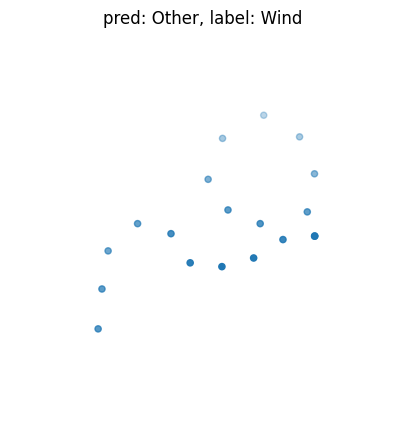

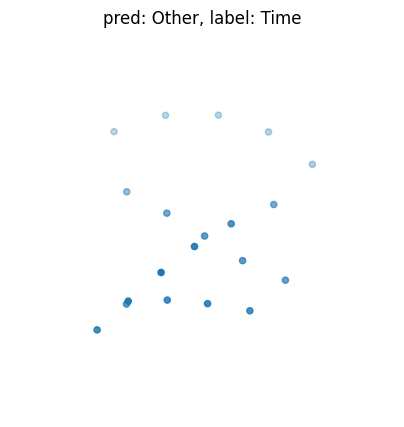

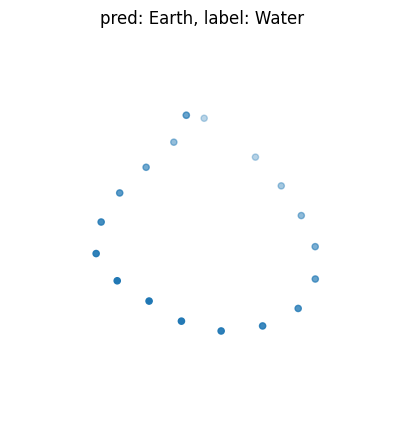

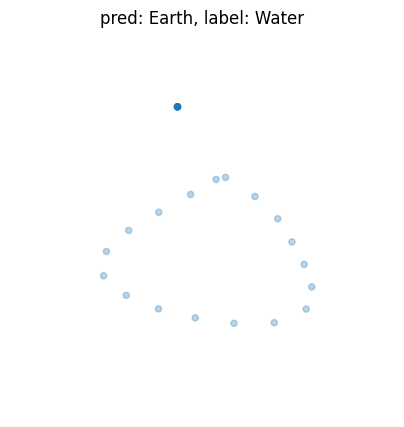

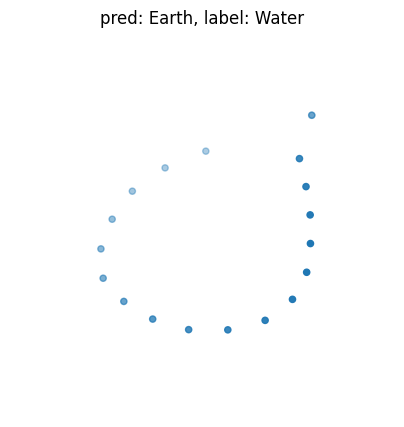

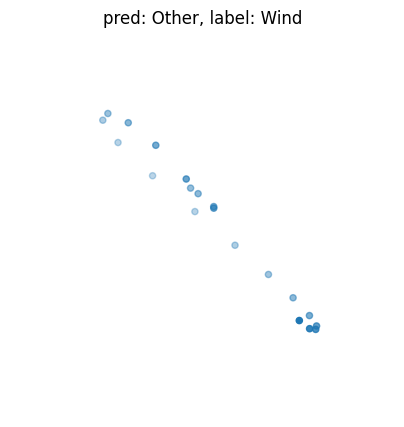

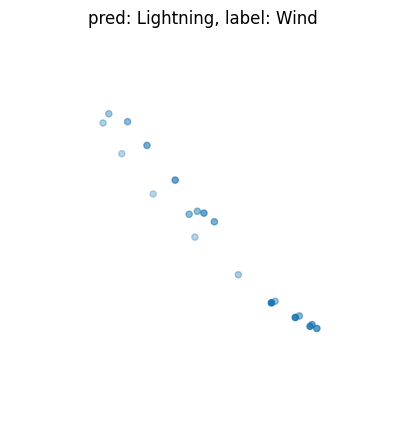

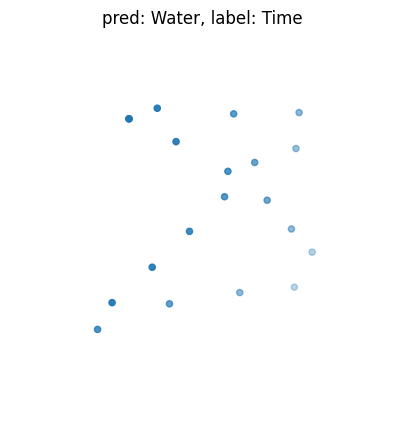

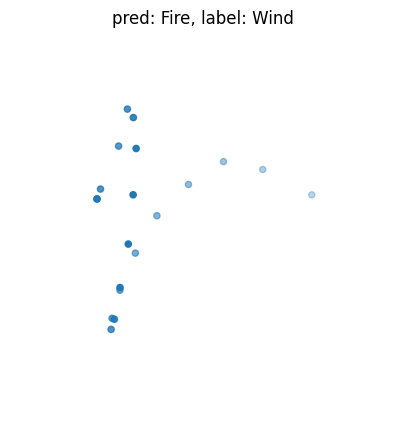

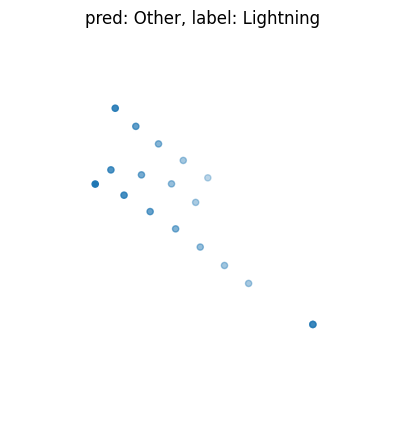

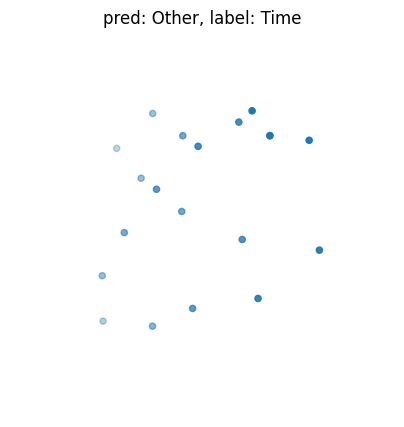

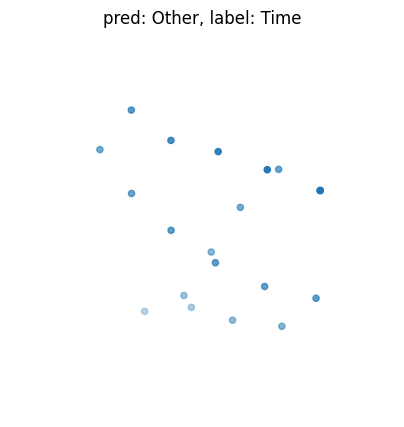

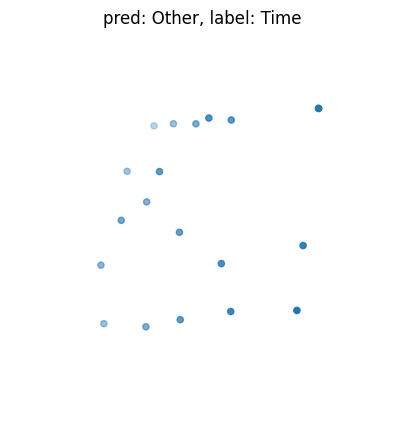

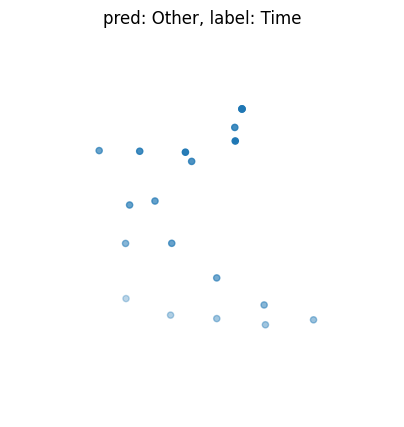

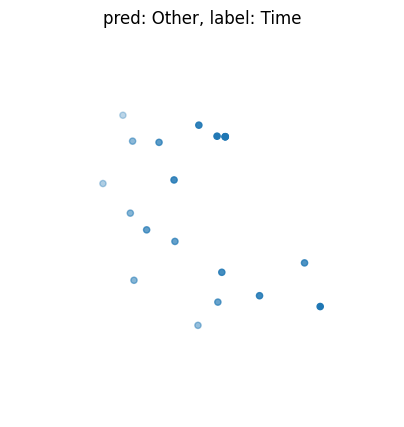

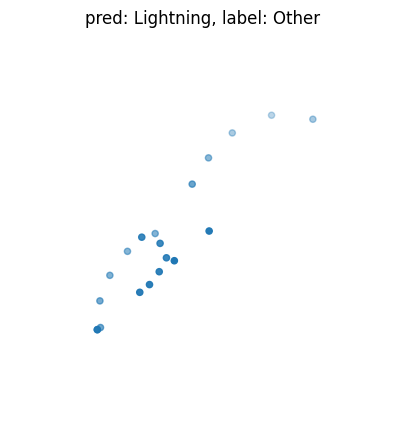

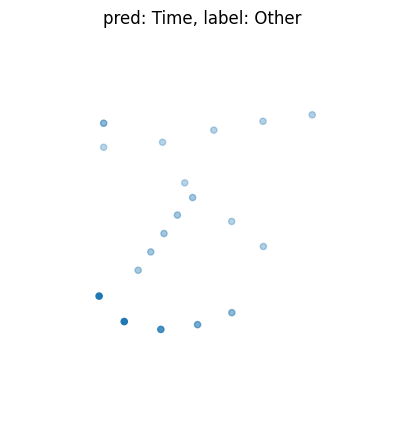

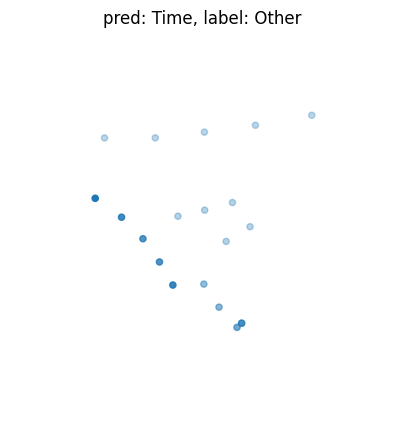

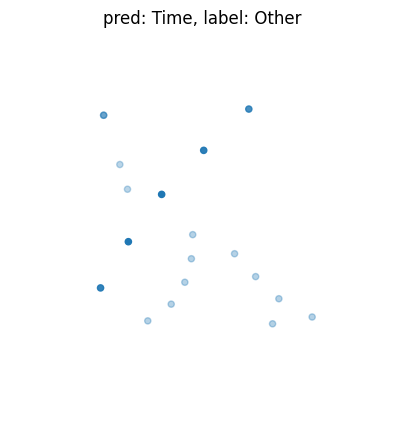

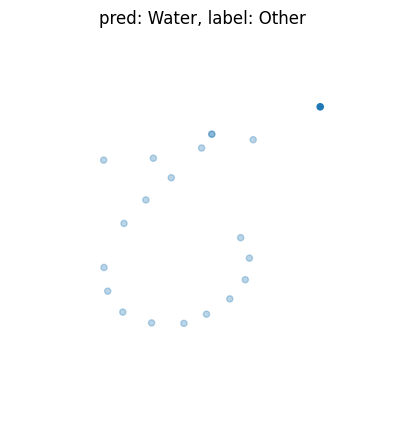

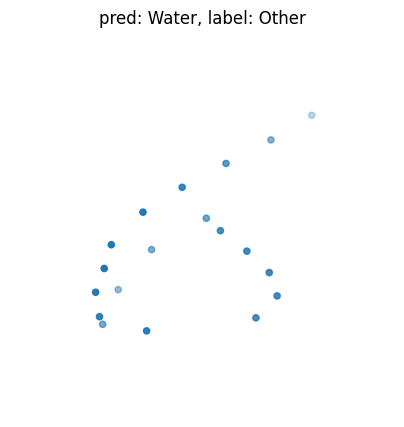

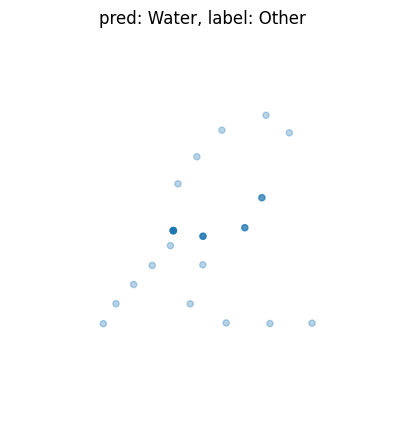

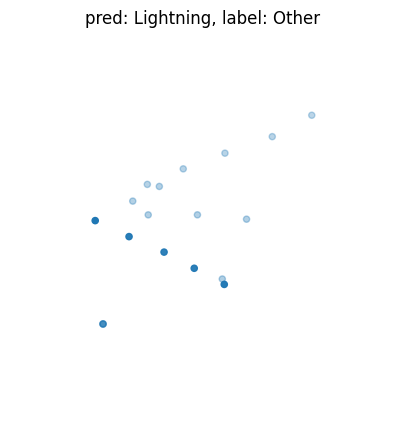

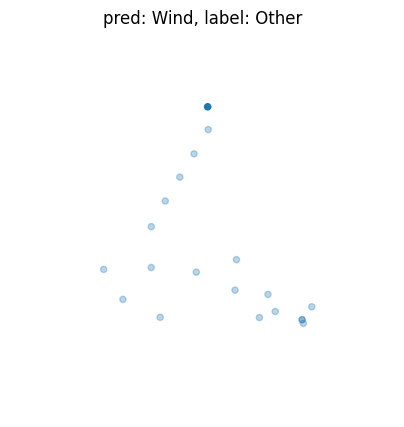

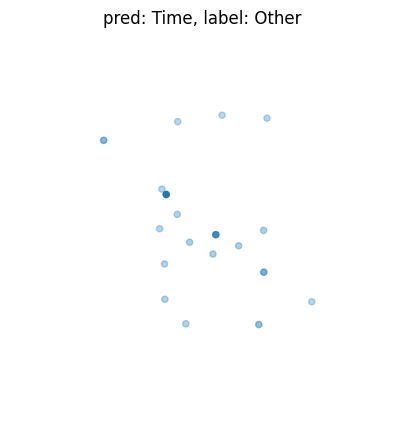

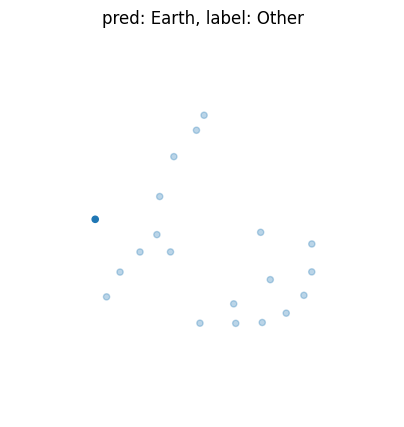

In [44]:
class_map = {}
class_map[0] = "Time"
class_map[1] = "Wind"
class_map[2] = "Fire"
class_map[3] = "Earth"
class_map[4] = "Water"
class_map[5] = "Lightning"
class_map[6] = "Other"

for i in range(len(X_3d)):
    if np.array(y_true)[i] != y_pred[i]:
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111, projection="3d")
        ax.set_title(
            "pred: {:}, label: {:}".format(
                class_map[y_pred[i]], class_map[np.array(y_true)[i][0]]
            )
        )
        points = X_3d[i]
        ax.scatter(points[:, 0], points[:, 1], points[:, 2])
        ax.set_axis_off()
        ax.view_init(elev=90, azim=0, roll=90)
        plt.show()
